In [1]:
detection_folders = r'\\Desktop-0331tte\d\chiletv-testdata\detection'

In [2]:
import json
from pathlib import Path
from itertools import repeat

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
columns = ['video_id', 'frame_rate', 'max_frame_size', 'frame_scale', 'width', 'height', 'face_width', 'face_height']

def read_data(path):
    with path.open('r', encoding='utf8') as fp:
        obj = json.load(fp)
    
    if 'frame_scale' not in obj:
        obj['frame_scale'] = int(path.parent.name[1:path.parent.name.index('-')])
    
    obj['video_id'] = path.name[:path.name.index('.')]
    
    bounding_box = [o for o in obj['bounding_box'] if len(o) != 0]
    bounding_box = np.concatenate(bounding_box)
    
    obj['face_width'] = bounding_box[:, 2] - bounding_box[:, 0]
    obj['face_height'] = bounding_box[:, 3] - bounding_box[:, 1]
    
    return [obj[i] for i in columns]
    
data = {}
for folder_path in Path(detection_folders).glob('*'):
    data[folder_path.name] = {k:[] for k in columns}
    for path in folder_path.glob('*.detections.json'):
        for k, v in zip(columns, read_data(path)):
            data[folder_path.name][k].append(v)
    if len(data[folder_path.name]['video_id']) == 0:
        del data[folder_path.name]
    else:
        print(folder_path.name, len(data[folder_path.name]['video_id']))

S1-none@15FPS 82
S1-none@30FPS 131
S1-none@3FPS 133
S1-none@6FPS 94


In [4]:
test_cases = {'width': [], 'height': [], 'face_width': [], 'face_height': []}

for folder_name, folder_data in data.items():
    for key in test_cases.keys():
        items = folder_data[key]
        if not key.startswith('face'):
            items = [items]
        for item in items:
            test_cases[key].extend(item)
            
for key in test_cases.keys():
    test_cases[key] = np.float32(test_cases[key])

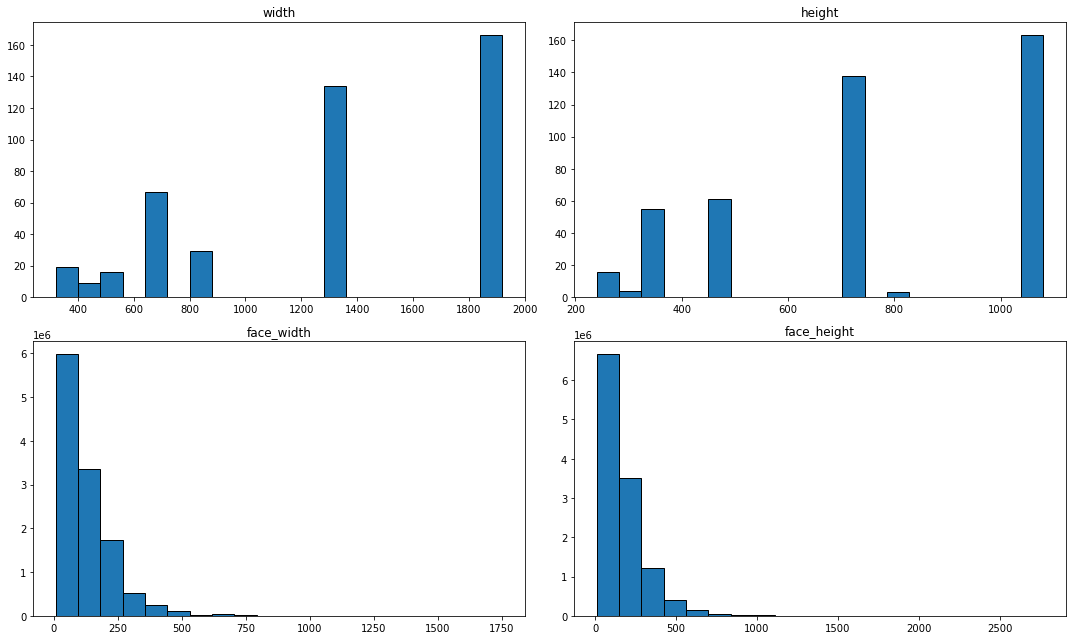

In [5]:
bins = {}

fig, axs = plt.subplots(2, 2, figsize=(15, 9))
axs = axs.flatten()

for i, (text, arr) in enumerate(test_cases.items()):
    hist, bins[text] = np.histogram(arr, 20)
    widths = bins[text][1:] - bins[text][:-1]
    axs[i].bar(bins[text][:-1], hist, width=widths, edgecolor='black', align='edge')
    axs[i].set_title(text)
plt.tight_layout()
# plt.savefig('images/video_dist_length.svg', bbox_inches='tight')
# plt.savefig('images/video_dist_length.png', bbox_inches='tight')
plt.show()

In [8]:
for folder_name, folder_data in data.items():
    folder_data = folder_data.copy()
    folder_data['folder_name'] = folder_name
    for key in folder_data.keys():
        if not key.startswith('face'):
            folder_data[key] = repeat(folder_data[key])
    print(list(zip(*folder_data.values())))
    

[(['-75gXEApdNQ', '0VrxAn-goEw', '0yTEcgQNoQo', '26wTw6UGoAY', '3h_idnfM5Mw', '3zbCMOTMYQ0', '4D6X_wWx_6k', '51HFQM3yPo4', '7-x4Pik4ztU', '78ssC83YlOk', '8iTclIv-iZs', '9MuIAVhmOn8', '9NpqcrW4FoY', '9VyuDAUC0YE', 'AlJWn8Vnn7E', 'AMbFy_w00VU', 'AsiQkIOSLj0', 'B6OM-wAB3cM', 'b85zz8XkVO4', 'bP6op_zC_Lc', 'c0hOSSRf92w', 'C52lC_56SBI', 'CCQptiAh_VY', 'cLI37CuaPv0', 'cWt2WHYt-g4', 'dh-6LlKrbas', 'Dhs_IMxEI4Y', 'DN4kMc26gmk', 'DUHP8I-EoUI', 'dV33rE1IUB8', 'dZn5ZOF0XrU', 'FD7ASrSrQk4', 'Feyr1xSziiA', 'FWgUO9JHYWM', 'gazNxkL0Y1I', 'GiXJajiWHlg', 'gkHascgPc1g', 'H-ZpjCax8g4', 'hDWfVV4BE_c', 'hwCSDV4esEs', 'IIzB4J_cN2c', 'IPI2nanuQF0', 'JkQ1ou8jEBo', 'jQQdxpeV4YA', 'Jwy1KfhQMZ8', 'JYuV9kVbljo', 'k-Fdyi5SKjA', 'kGN12CSARD8', 'KgVW-euTY5g', 'KXZnOyFLjKU', 'KZlZlFq4UAc', 'k_NWf1REW-4', 'LZIgIhHADMo', 'L_cDkHous0o', 'NnyM1jRYMfc', 'ns08YNU2tzk', 'oBvD4ox9Aik', 'oQnRdoOLDrY', 'O_tXbLZcDoE', 'PPRhJKiVx7E', 'Pv6riyAAvjY', 'QwoGcTLAS0Q', 'r93suYNwcuE', 'RHOCpiy5ysY', 'RifdTdEfOcM', 'SDg8k4unARE', 'T6Vi0K

[(['-75gXEApdNQ', '0VrxAn-goEw', '0yTEcgQNoQo', '1dCoXH61eyc', '26wTw6UGoAY', '2EBekZXEF3w', '2S4vdPkmANM', '3h_idnfM5Mw', '3zbCMOTMYQ0', '4ashVec0QJw', '4D6X_wWx_6k', '4GrZ6AaXnig', '51HFQM3yPo4', '6ocBhGNG53I', '76ZWlmpU8NI', '78ssC83YlOk', '7C80D-iCWp0', '86MUrGTNpFk', '8AjnrIDJ9Dk', '8iTclIv-iZs', '8p_NgUrcOYo', '8qmqhZyXmbw', '9MuIAVhmOn8', '9NpqcrW4FoY', '9VyuDAUC0YE', 'aivXESc5jrs', 'AlJWn8Vnn7E', 'als9TAvyGgo', 'AMbFy_w00VU', 'aOmSvH-5Gck', 'AsiQkIOSLj0', 'b0bLPsJ6PNs', 'B6OM-wAB3cM', 'B6WLFKUZcl8', 'b85zz8XkVO4', 'bA1AXnTw0xA', 'bP6op_zC_Lc', 'c0hOSSRf92w', 'C52lC_56SBI', 'CCQptiAh_VY', 'CKgNteI4pdM', 'cLI37CuaPv0', 'CLyIotg0mpY', 'cWt2WHYt-g4', 'dh-6LlKrbas', 'Dhs_IMxEI4Y', 'DN4kMc26gmk', 'DUHP8I-EoUI', 'dV33rE1IUB8', 'dZn5ZOF0XrU', 'eL_Z3081iGk', 'FD7ASrSrQk4', 'Feyr1xSziiA', 'FMdkxVQuMqA', 'FWgUO9JHYWM', 'g3xBJeM9fkM', 'g83kvsaR23U', 'gazNxkL0Y1I', 'GEwzkBy3SkQ', 'gGlWgLI1_kM', 'GiXJajiWHlg', 'gQY-5f_w6oU', 'H-ZpjCax8g4', 'hDWfVV4BE_c', 'hEhbxx8TPgc', 'Hgs1FCxGIv4', 'hwCSDV